# Data understanding and cleaning


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shantanudhakadd/bank-customer-churn-prediction")

print("Path to dataset files:", path)

100%|██████████| 262k/262k [00:00<00:00, 530kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shantanudhakadd/bank-customer-churn-prediction/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(path +'/Churn_Modelling.csv')

In [ ]:
df = data.copy()

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.corr(numeric_only=True)['Exited']

,Exited
RowNumber,-0.016571
CustomerId,-0.006248
CreditScore,-0.027094
Age,0.285323
Tenure,-0.014001
Balance,0.118533
NumOfProducts,-0.047820
HasCrCard,-0.007138
IsActiveMember,-0.156128
EstimatedSalary,0.012097


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


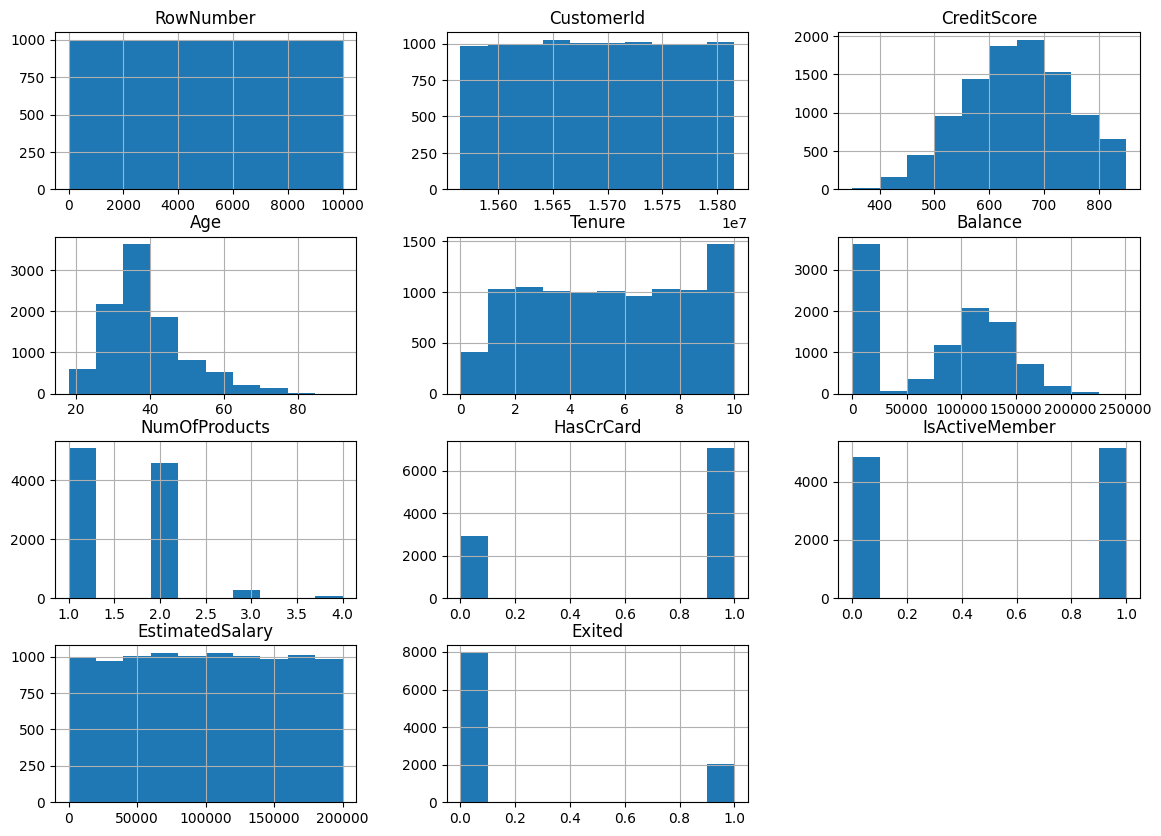

In [ ]:
df.hist(figsize=(14,10));

#Checking if there are duplicate rows(if yes dropping them)

In [ ]:
# we see there is not any duplicate rows
df[df.duplicated(subset=['CustomerId'])]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# Dropping unnecessary columns

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


# Feature Engineering

In [ ]:
df['Creditworthiness'] = df['CreditScore'] / df['Balance']
df['BalanceToSalaryRatio'] = df['Balance'] / df['EstimatedSalary']
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Creditworthiness,BalanceToSalaryRatio
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,inf,0.000000
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.007255,0.744677
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.003144,1.401375
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,inf,0.000000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.006772,1.587055
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,inf,0.000000
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.008994,0.564108
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,inf,0.000000
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.010283,0.808230


In [ ]:
df.loc[df['Creditworthiness'].isin([np.inf, -np.inf]), 'Creditworthiness'] = np.nan
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Creditworthiness,BalanceToSalaryRatio
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,NaN,0.000000
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.007255,0.744677
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.003144,1.401375
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,NaN,0.000000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.006772,1.587055
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,NaN,0.000000
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.008994,0.564108
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,NaN,0.000000
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.010283,0.808230


In [ ]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [ ]:
df.corr(numeric_only=True)['Exited']

,Exited
CreditScore,-0.027094
Age,0.285323
Tenure,-0.014001
Balance,0.118533
NumOfProducts,-0.047820
HasCrCard,-0.007138
IsActiveMember,-0.156128
EstimatedSalary,0.012097
Exited,1.000000
Creditworthiness,0.004052


In [ ]:
# There is no any corr(neg. or pos.), so I dropped both columns
df.drop(['Creditworthiness', 'BalanceToSalaryRatio'], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#There is no null values
df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


#Train-test-split and Pipelines

In [ ]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [ ]:
X.shape

(10000, 10)

In [ ]:
y.shape

(10000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(8000, 10)

In [ ]:
X_test.shape

(2000, 10)

In [ ]:
y_train.shape

(8000,)

In [ ]:
y_test.shape

(2000,)

In [ ]:
import numpy as np
X_num = X_train.select_dtypes(include=np.number)
X_cat = X_train.select_dtypes(include='object')

In [ ]:
num_cols = X_train.select_dtypes(include=np.number).columns
cat_cols = X_train.select_dtypes(include='object').columns

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                        ])

cat_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
                        ])

preprocessing = ColumnTransformer([
                                  ('num', num_pipeline, num_cols),
                                  ('cat', cat_pipeline, cat_cols),
                                  ],
                                  remainder='passthrough')

In [ ]:
X_train_prepared = pd.DataFrame(preprocessing.fit_transform(X_train), columns = preprocessing.get_feature_names_out())
X_test_prepared = pd.DataFrame(preprocessing.transform(X_test), columns = preprocessing.get_feature_names_out())

In [ ]:
X_train_prepared.shape

(8000, 13)

In [ ]:
X_test_prepared.shape

(2000, 13)

#LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1.0, penalty='l2', max_iter = 200, random_state=42)
log_reg.fit(X_train_prepared, y_train)
log_reg.score(X_test_prepared, y_test)

0.811

In [ ]:
# f1_score of LogisticRegression
from sklearn.metrics import f1_score
y_pred = log_reg.predict(X_test_prepared)
f1_score(y_test, y_pred, average='macro')

0.592826858777705

#Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_prepared_poly = poly.fit_transform(X_train_prepared)
X_test_prepared_poly = poly.transform(X_test_prepared)

In [ ]:
log_reg.fit(X_train_prepared_poly, y_train)
log_reg.score(X_test_prepared_poly, y_test)

0.87

In [ ]:
# f1_score of polynomial
from sklearn.metrics import f1_score
y_pred_poly = log_reg.predict(X_test_prepared_poly)
f1_score(y_test, y_pred_poly, average='macro')

0.7685828010737759

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_train_prepared_poly, y_train, cv=5)
print("Cross-validation scores: ", scores)
print("Average accuracy: ", scores.mean())

Cross-validation scores:  [0.8625   0.855625 0.865625 0.8425   0.851875]
Average accuracy:  0.8556250000000001


# SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_prepared_poly, y_train)
sgd_clf.score(X_test_prepared_poly, y_test)

0.825

In [ ]:
# f1_score of SGDClassifier
y_pred_sgd = sgd_clf.predict(X_test_prepared_poly)
f1_score(y_test, y_pred_sgd, average='macro')

0.7134079236977255

# Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import RidgeClassifier

vot_clf  = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('sgd_clf', sgd_clf),
        ('ridge', RidgeClassifier(alpha=1, random_state=42))
               ]
                           )

vot_clf.fit(X_train_prepared_poly, y_train)
vot_clf.score(X_test_prepared_poly, y_test)

0.864

In [ ]:
y_pred = vot_clf.predict((X_test_prepared_poly))
f1_score(y_test, y_pred, average='macro')

0.7507897765170672